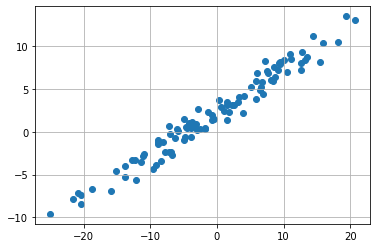

In [1]:
#import numpy as np
import autograd.numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib import cm

x = scipy.stats.norm.rvs(size=100)*10 # Data generation
y = 2.5 + 0.5 * x + scipy.stats.norm.rvs(size=100)

plt.scatter(x,y)
plt.grid()

RSS of initial guess:  2827.5102076022017


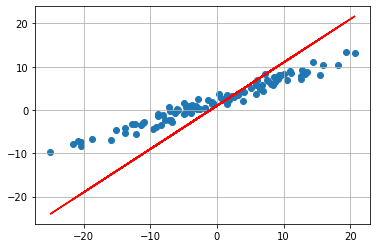

In [2]:
def RSS(beta):
    y_p = beta[0] + beta[1]*x
    return np.sum((y_p-y)**2)

beta0,beta1 = 1,1 #define initial guess

plt.scatter(x,y)
plt.grid()
y_p = beta0 + beta1*x
plt.plot(x,y_p,"r")

print("RSS of initial guess: ",RSS(np.array([beta0,beta1])))

RSS of optimum:  93.11659910107687


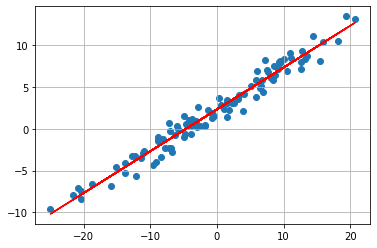

In [3]:
iters = []
start = np.array([1,1,RSS(np.array([1,1]))])
iters.append(start)
def callbackF(Xi):
    iterations = np.append(Xi,RSS(Xi))
    iters.append(iterations)

opt = scipy.optimize.minimize(RSS, x0=np.array([1,1]), args=(), method='TNC', callback=callbackF) #optimize using scipy implementation of truncated newton's method
iters= np.asarray(iters)

plt.scatter(x,y)
plt.grid()
y_p = opt.x[0] + opt.x[1]*x
plt.plot(x,y_p,"r")

print("RSS of optimum: ",RSS(np.array([opt.x[0],opt.x[1]])))

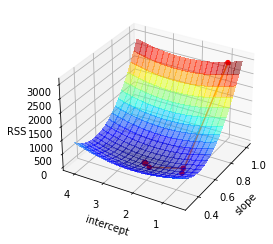

<Figure size 864x720 with 0 Axes>

In [4]:
intercept = opt.x[0]
slope = opt.x[1]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25) #slope
X = np.linspace(slope-0.2, slope+0.5, 20)
Y = np.arange(-5, 5, 0.25) #intercept
Y = np.linspace(intercept-1.8, intercept+1.8, 20)

rss_values_all = []
for slope_alt in np.linspace(slope-0.2, slope+0.5, 20):
    rss_values_x = []
    for intercept_alt in np.linspace(intercept-1.8, intercept+1.8, 20):
        rss_values_x.append(RSS(np.array([intercept_alt,slope_alt])))
    rss_values_all =  np.append(rss_values_all,rss_values_x,axis=0)

plt.figure(figsize=(12,10))
X, Y = np.meshgrid(X, Y)
Z = rss_values_all.reshape(20,20).T

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, linewidth=0.5, antialiased=False, cmap='jet', alpha=0.5)
ax.set_xlabel('slope')
ax.set_ylabel('intercept')
ax.set_zlabel('RSS')
dots = ax.scatter3D(iters[:,1], iters[:,0], iters[:,2],s=20, c='r', marker='o', alpha=1) # ToDo add order of iterations
lines = ax.plot(iters[:,1], iters[:,0], iters[:,2]) 
ax.view_init(30, 210)
plt.show()

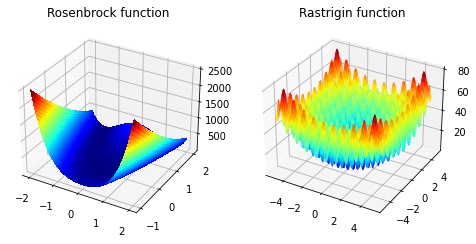

<Figure size 432x288 with 0 Axes>

In [5]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

X = np.linspace(-2, 2, 100)     
Y = np.linspace(-1, 2, 100)   

X, Y = np.meshgrid(X, Y)

def Rosenbrock(X):
    Z = 100.0*(X[1] - X[0]**2.0)**2.0 + (1 - X[0])**2.0
    return Z
Z =  Rosenbrock(np.array([X,Y]))

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet',linewidth=0, antialiased=False)
ax.set_title("Rosenbrock function")
#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot rastrigin
X = np.linspace(-5.12, 5.12, 100)     
Y = np.linspace(-5.12, 5.12, 100)     
X, Y = np.meshgrid(X, Y)

def Rastrigin(X):
    Z = (X[0]**2 - 10 * np.cos(2 * np.pi * X[0])) + (X[1]**2 - 10 * np.cos(2 * np.pi * X[1])) + 20
    return Z

Z = Rastrigin(np.array([X,Y]))

fig = plt.figure() 
surf2 = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='jet', linewidth=0.08,antialiased=True)   
ax.set_title("Rastrigin function")
plt.show()

In [6]:
from autograd import grad    
grad_rose = grad(Rosenbrock)       # Obtain its gradient function

def gradient_descent(fun, grad_fun, start_value, max_iters, step_size):
    x_old = start_value 
    alpha = step_size
    hist = []
    start = np.append(start_value, fun(start_value)) #start x,y
    hist.append(start) 
    for i in range(max_iters):
        norm_grad = -(grad_fun(x_old)/abs(grad_fun(x_old))) #normalize gradient
        x_new = x_old+alpha*norm_grad #gradient descent step
        hist.append(np.append(x_new,fun(x_new)))#appending history
        x_old = x_new
    hist= np.asarray(hist)
    return x_new, hist


Rosenbrock
[0.8  0.64]
Rastrigin
[-1.98 -1.  ]


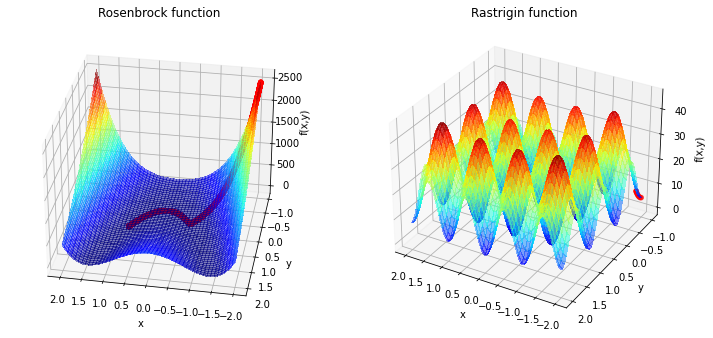

In [7]:
x_end ,hist = gradient_descent(fun=Rosenbrock, grad_fun=grad_rose,start_value=np.array([-2.0,-1.0]),max_iters=20000,step_size=0.0005)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 2, 1, projection='3d')
X = np.linspace(-2, 2, 100)     
Y = np.linspace(-1, 2, 100)   

X, Y = np.meshgrid(X, Y)

Z =  Rosenbrock(np.array([X,Y]))

iters=hist

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, linewidth=0.5, antialiased=False, cmap='jet' , alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
dots = ax.scatter3D(iters[:,0], iters[:,1], iters[:,2],s=20, c='r', marker='o') 
lines = ax.plot(iters[:,0], iters[:,1], iters[:,2]) 
ax.view_init(30, 100)
ax.set_title("Rosenbrock function")
print("Rosenbrock")
print(x_end)


ax = fig.add_subplot(1, 2, 2, projection='3d')
grad_rast =  grad(Rastrigin) 
x_end ,hist = gradient_descent(fun=Rastrigin, grad_fun=grad_rast,start_value=np.array([-1.9,-0.9]),max_iters=10,step_size=0.01)

iters= hist

X = np.linspace(-2, 2, 100)     
Y = np.linspace(-1, 2, 100)   

X, Y = np.meshgrid(X, Y)

Z =  Rastrigin(np.array([X,Y]))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, linewidth=0.5, antialiased=False, cmap='jet', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
dots = ax.scatter3D(iters[:,0], iters[:,1], iters[:,2],s=20, c='r', marker='o') # ToDo add order of iterations
lines = ax.plot(iters[:,0], iters[:,1], iters[:,2]) 
ax.view_init(30, 120)   
ax.set_title("Rastrigin function")
print("Rastrigin")
print(x_end)
plt.show()


In [8]:
from autograd import grad    
grad_rose = grad(Rosenbrock)       # Obtain its gradient function

def mom_gradient_descent(fun, grad_fun, start_value, max_iters, step_size,beta=0.9):
    x_old = start_value
    momentum_old = 0.0
    #beta = 0.9
    alpha = step_size
    hist = []
    start = np.append(start_value, fun(start_value)) #start x,y
    hist.append(start) 
    for i in range(max_iters):
        norm_grad = -(grad_fun(x_old)/abs(grad_fun(x_old))) #normalize gradient
        momentum_new  = beta*momentum_old+alpha*norm_grad #momentum calculation
        x_new = x_old+momentum_new #gradient descent step
        hist.append(np.append(x_new,fun(x_new)))#appending history
        x_old = x_new
        momentum_old = momentum_new
    hist= np.asarray(hist)
    return x_new, hist

Rosenbrock
[1.0980919 0.9019081]
Rastrigin
[-2. -1.]


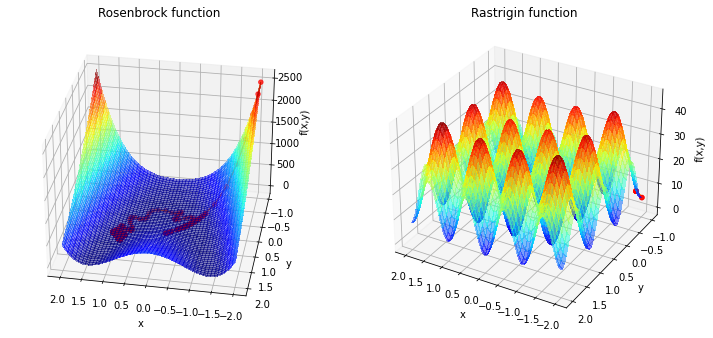

In [9]:
x_end ,hist = mom_gradient_descent(fun=Rosenbrock, grad_fun=grad_rose,start_value=np.array([-2.0,-1.0]),max_iters=2000,step_size=0.05,beta=0.90)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 2, 1, projection='3d')
X = np.linspace(-2, 2, 100)     
Y = np.linspace(-1, 2, 100)   

X, Y = np.meshgrid(X, Y)

Z =  Rosenbrock(np.array([X,Y]))

iters=hist

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, linewidth=0.5, antialiased=False, cmap='jet' , alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
dots = ax.scatter3D(iters[:,0], iters[:,1], iters[:,2],s=20, c='r', marker='o') 
lines = ax.plot(iters[:,0], iters[:,1], iters[:,2]) 
ax.view_init(30, 100)
ax.set_title("Rosenbrock function")
print("Rosenbrock")
print(x_end)


ax = fig.add_subplot(1, 2, 2, projection='3d')
grad_rast =  grad(Rastrigin) 
x_end ,hist = mom_gradient_descent(fun=Rastrigin, grad_fun=grad_rast,start_value=np.array([-1.9,-0.9]),max_iters=10,step_size=0.1,beta=1)

iters= hist

X = np.linspace(-2, 2, 100)     
Y = np.linspace(-1, 2, 100)   

X, Y = np.meshgrid(X, Y)

Z =  Rastrigin(np.array([X,Y]))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, linewidth=0.5, antialiased=False, cmap='jet', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
dots = ax.scatter3D(iters[:,0], iters[:,1], iters[:,2],s=20, c='r', marker='o') # ToDo add order of iterations
lines = ax.plot(iters[:,0], iters[:,1], iters[:,2]) 
ax.view_init(30, 120)   
ax.set_title("Rastrigin function")
print("Rastrigin")
print(x_end)
plt.show()

In [10]:
def stochastic_gradient_descent(fun, grad_fun, start_value, max_iters, step_size, init_noise=1):
    x_old = start_value 
    alpha = step_size
    hist = []
    start = np.append(start_value, fun(start_value)) #start x,y
    hist.append(start) 
    for i in range(max_iters):
        norm_grad = -(grad_fun(x_old)/abs(grad_fun(x_old))) #normalize gradient
        x_new = x_old+alpha*norm_grad+init_noise*np.random.rand(1,2).reshape(2)*1/(i+1) #gradient descent step + noise
        hist.append(np.append(x_new,fun(x_new)))#appending history
        x_old = x_new
    hist= np.asarray(hist)
    return x_new, hist

Rosenbrock
[1.03667531 1.07185404]
Rastrigin
[0.90927077 2.05942606]


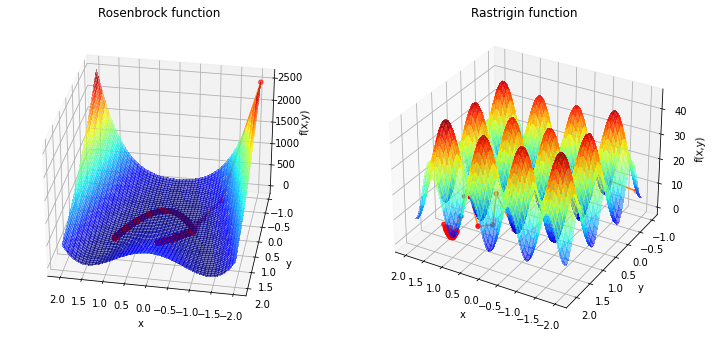

In [11]:
x_end ,hist = stochastic_gradient_descent(fun=Rosenbrock, grad_fun=grad_rose,start_value=np.array([-2.0,-1.0]),max_iters=2000,step_size=0.005)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 2, 1, projection='3d')
X = np.linspace(-2, 2, 100)     
Y = np.linspace(-1, 2, 100)   

X, Y = np.meshgrid(X, Y)

Z =  Rosenbrock(np.array([X,Y]))

iters=hist

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, linewidth=0.5, antialiased=False, cmap='jet' , alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
dots = ax.scatter3D(iters[:,0], iters[:,1], iters[:,2],s=20, c='r', marker='o') 
lines = ax.plot(iters[:,0], iters[:,1], iters[:,2]) 
ax.view_init(30, 100)
ax.set_title("Rosenbrock function")
print("Rosenbrock")
print(x_end)


ax = fig.add_subplot(1, 2, 2, projection='3d')
grad_rast =  grad(Rastrigin) 
x_end ,hist = stochastic_gradient_descent(fun=Rastrigin, grad_fun=grad_rast,start_value=np.array([-1.9,-0.9]),max_iters=100,step_size=0.1,init_noise=2)

iters= hist

X = np.linspace(-2, 2, 100)     
Y = np.linspace(-1, 2, 100)   

X, Y = np.meshgrid(X, Y)

Z =  Rastrigin(np.array([X,Y]))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, linewidth=0.5, antialiased=False, cmap='jet', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
dots = ax.scatter3D(iters[:,0], iters[:,1], iters[:,2],s=20, c='r', marker='o') # ToDo add order of iterations
lines = ax.plot(iters[:,0], iters[:,1], iters[:,2]) 
ax.view_init(30, 120)   
ax.set_title("Rastrigin function")
print("Rastrigin")
print(x_end)
plt.show()

Rosenbrock
     fun: 1.9721522630525295e-31
 message: 'Optimization terminated successfully.'
    nfev: 4473
     nit: 148
 success: True
       x: array([1., 1.])
Rastrigin
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 1623
     nit: 53
 success: True
       x: array([4.47147208e-10, 1.43678097e-09])


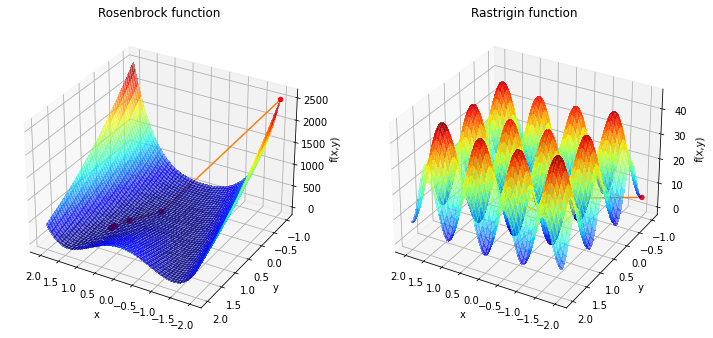

In [12]:
fig = plt.figure(figsize=(12,8))
#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

iters = []
start_vector = np.array([-2,-1])
start = np.append(start_vector,Rosenbrock(start_vector))
iters.append(start)
def callbackRo(Xi, convergence):
    iterations = np.append(Xi,Rosenbrock(Xi))
    iters.append(iterations)


#opt = scipy.optimize.minimize(Rosenbrock, x0=start_vector, args=(), method='CG', callback=callbackRo) #optimize using scipy implementation of truncated newton's method

bounds = [(-2,2), (-1, 2)]
opt = scipy.optimize.differential_evolution(Rosenbrock, bounds, callback=callbackRo)

iters= np.asarray(iters)
#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#fig2 =plt.figure("111",figsize=(12,10))
X = np.linspace(-2, 2, 100)     
Y = np.linspace(-1, 2, 100)   

X, Y = np.meshgrid(X, Y)

Z =  Rosenbrock(np.array([X,Y]))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, linewidth=0.5, antialiased=False, cmap='jet' , alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
dots = ax.scatter3D(iters[:,0], iters[:,1], iters[:,2],s=20, c='r', marker='o') # ToDo add order of iterations
lines = ax.plot(iters[:,0], iters[:,1], iters[:,2]) 
ax.view_init(30, 120)
ax.set_title("Rosenbrock function")
print("Rosenbrock")
print(opt)
#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

iters = []
start_vector = np.array([-2,-1])
start = np.append(start_vector,Rastrigin(start_vector))
iters.append(start)
def callbackRa(Xi, convergence):
    iterations = np.append(Xi,Rastrigin(Xi))
    iters.append(iterations)

# opt = scipy.optimize.minimize(Rastrigin, x0=start_vector, args=(), method='CG', callback=callbackR) #optimize using scipy implementation of truncated newton's method
bounds = [(-2,2), (-1, 2)]
opt = scipy.optimize.differential_evolution(Rastrigin, bounds, callback=callbackRa)

iters= np.asarray(iters)

X = np.linspace(-2, 2, 100)     
Y = np.linspace(-1, 2, 100)   

X, Y = np.meshgrid(X, Y)

Z =  Rastrigin(np.array([X,Y]))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, linewidth=0.5, antialiased=False, cmap='jet', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
dots = ax.scatter3D(iters[:,0], iters[:,1], iters[:,2],s=20, c='r', marker='o') # ToDo add order of iterations
lines = ax.plot(iters[:,0], iters[:,1], iters[:,2]) 
ax.view_init(30, 120)   
ax.set_title("Rastrigin function")
print("Rastrigin")
print(opt)
plt.show()